<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Stochastics

### due 2024-01-26 ###

HW submission by group (up to 4 people)
* Hieu Trung Vu <hvu@illinois.edu>
I cannot find where the group has been assign so I just do this problem myself. Sorry if this caused any inconvenience.


Note:  Anaconda Python <https://www.anaconda.com/distribution/> is a strong implementation of python.

## imports and graphics configurations

In [ ]:
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

# **Pairs Trading** #

**Cointegration:** Is it better to regress F on GM, or GM on F?  This is an open-ended question with no fixed correct answer. I want you to investigate, come to a conclusion, and defend it.

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":3
}
plt.rcParams.update(params)

pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

ticker_A="F"
filedata_A=(ticker_A+".csv","https://drive.google.com/file/d/1c1Xz-oGxA0tmvkg5PaHRLYcS4HJtN94p/view?usp=sharing")


ticker_B="GM"
filedata_B=(ticker_B+".csv","https://drive.google.com/file/d/17OyqyKcxa6oILrrLyNVE-zs0kT--T_0-/view?usp=sharing")

color_A="red"
color_B="blue"

existing png files: []
[]


In [ ]:
data_A=getfile(filedata_A).set_index("Date",drop=True)
data_A.index = pandas.to_datetime(data_A.index)
print(data_A.head(10))

local file not found; accessing Google Drive
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-01-03  11.82  11.92  11.57  11.68  10.570136  45809000
2023-01-04  11.88  12.08  11.74  12.01  10.868779  53429700
2023-01-05  12.11  12.38  11.88  12.25  11.085972  50785600
2023-01-06  12.12  12.59  12.10  12.58  11.384616  53089100
2023-01-09  12.74  12.93  12.55  12.69  11.484161  50865500
2023-01-10  12.68  12.87  12.50  12.84  11.619910  47065500
2023-01-11  12.93  13.26  12.89  13.22  11.963801  51911600
2023-01-12  13.27  13.53  13.11  13.43  12.153846  58113700
2023-01-13  12.63  12.82  12.47  12.72  11.511312  96444000
2023-01-17  12.71  12.85  12.43  12.67  11.466063  60774900


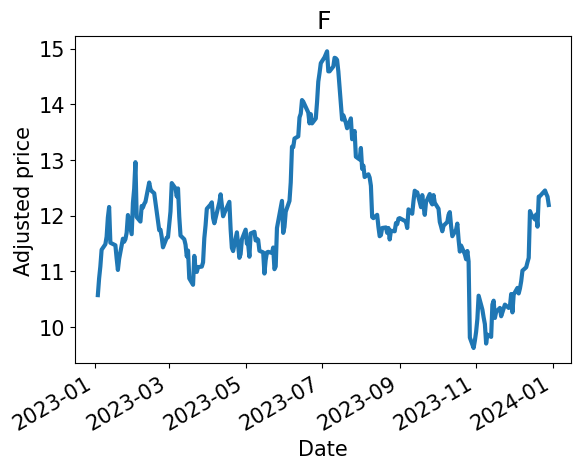

In [ ]:
t=data_A.head()
t
adj_A=pandas.Series(data_A["Adj Close"],name=ticker_A)
plt.figure()
plt.plot(adj_A.index,adj_A,label=ticker_A)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_A)
plt.gcf().autofmt_xdate()
saver("tickerA")
plt.show()
plt.close()

local file not found; accessing Google Drive
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-03  34.020000  34.340000  33.400002  33.820000  33.461422  11793300
2023-01-04  34.290001  34.950001  34.090000  34.689999  34.322197  11326300
2023-01-05  34.200001  35.439999  34.119999  35.000000  34.628914  11932000
2023-01-06  34.689999  36.009998  34.549999  35.910000  35.529259   9783500
2023-01-09  36.529999  36.840000  35.849998  35.919998  35.539154  11617900
2023-01-10  36.139999  37.139999  35.900002  37.110001  36.716541  10280400
2023-01-11  37.349998  38.110001  37.150002  37.820000  37.419014  15190300
2023-01-12  38.139999  38.610001  37.830002  38.330002  37.923607  15318500
2023-01-13  36.480000  36.730000  35.810001  36.509998  36.122902  21242800
2023-01-17  36.500000  37.139999  36.209999  36.610001  36.221844  13916100


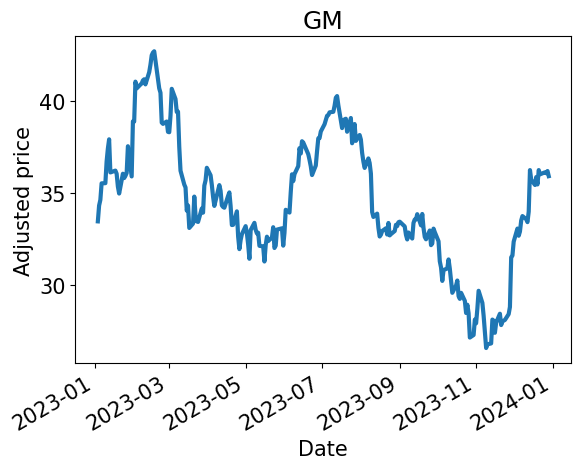

In [ ]:
data_B=getfile(filedata_B).set_index("Date",drop=True)
data_B.index = pandas.to_datetime(data_B.index)
print(data_B.head(10))
adj_B=pandas.Series(data_B["Adj Close"],name=ticker_B)

plt.figure()
plt.plot(adj_B.index,adj_B,label=ticker_B)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_B)
plt.gcf().autofmt_xdate()
saver("tickerB")
plt.show()
plt.close()

                    F         GM
Date                            
2023-01-03  10.570136  33.461422
2023-01-04  10.868779  34.322197
2023-01-05  11.085972  34.628914
2023-01-06  11.384616  35.529259
2023-01-09  11.484161  35.539154


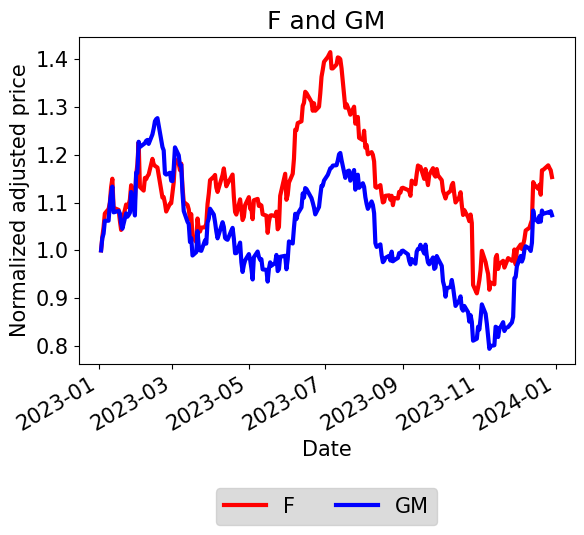

In [ ]:
joined_data=pandas.concat([adj_A,adj_B],axis="columns").dropna(axis="index")
print(joined_data.head())
(adj_A,adj_B)=(joined_data[ticker_A],joined_data[ticker_B])
normalized_A=adj_A/adj_A[0]
normalized_B=adj_B/adj_B[0]

plt.figure()
plt.plot(normalized_A.index,normalized_A,label=ticker_A,color=color_A)
plt.plot(normalized_B.index,normalized_B,label=ticker_B,color=color_B)
plt.ylabel("Normalized adjusted price")
plt.xlabel("Date")
plt.title(ticker_A+" and "+ticker_B)
plt.gcf().autofmt_xdate()
legend("bottom",extra=True)
saver("pair")
plt.show()
plt.close()

**For the case of regressing GM based on F**

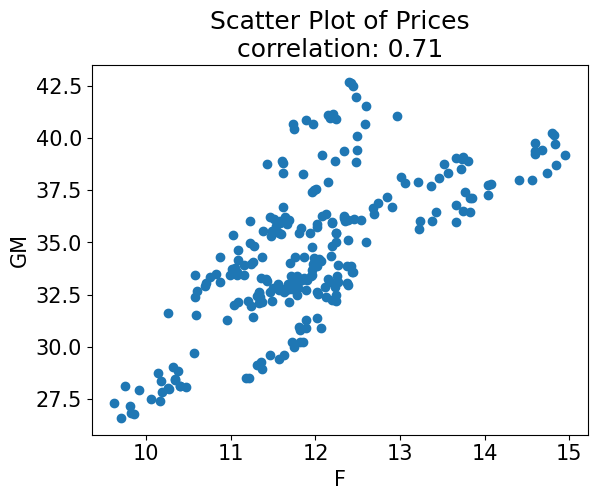

In [ ]:
corr,_=scipy.stats.pearsonr(adj_A,adj_B)
title_str="Scatter Plot of Prices\ncorrelation: {:.2f}".format(corr)
plt.scatter(adj_A,adj_B)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(title_str)
saver("scatter")
plt.show()
plt.close()

**Generic scatter plot in the other direction**

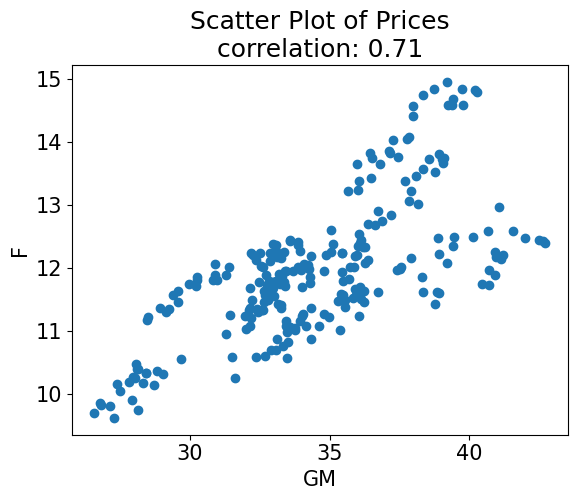

In [ ]:
corr,_=scipy.stats.pearsonr(adj_B,adj_A)
title_str="Scatter Plot of Prices\ncorrelation: {:.2f}".format(corr)
plt.scatter(adj_B,adj_A)
plt.xlabel(ticker_B)
plt.ylabel(ticker_A)
plt.title(title_str)
saver("scatter")
plt.show()
plt.close()

# Regression


Regressing GM based on F:

slope: 2.320701800294938
intercept: 6.741090806355828
Date
2023-01-03    2.190198
2023-01-04    2.357911
2023-01-05    2.160588
2023-01-06    2.367869
2023-01-09    2.146750
Name: residual, dtype: float64


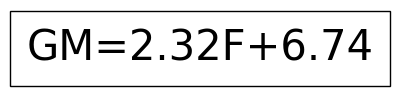

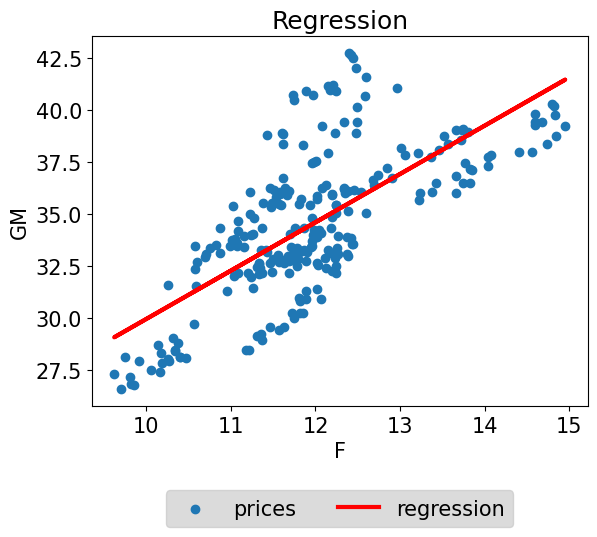

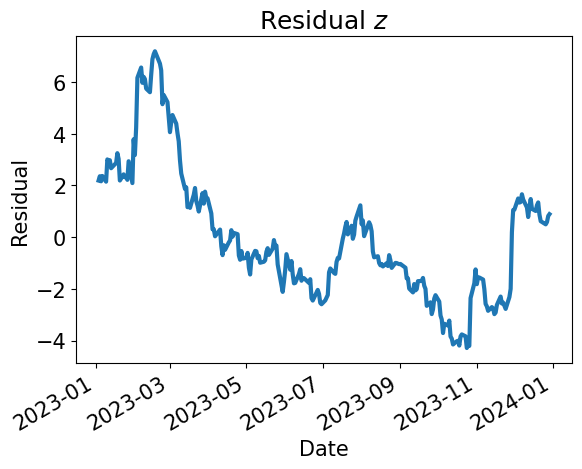

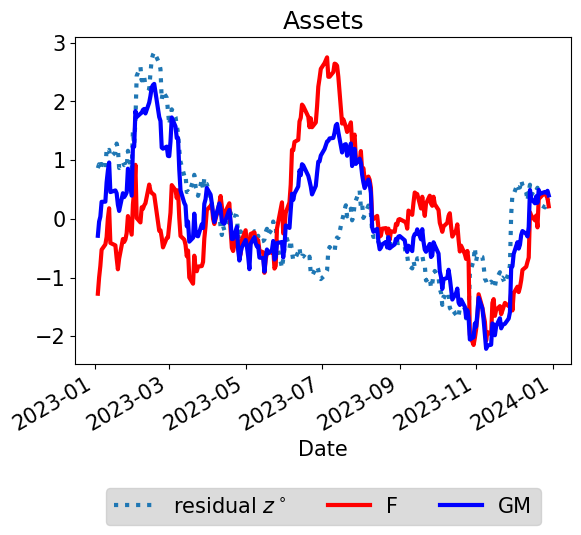

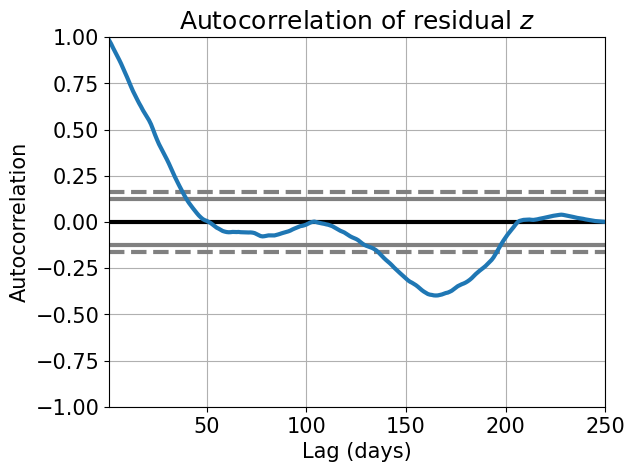

            residual  residual_lagged
Date                                 
2023-01-03  2.190198              NaN
2023-01-04  2.357911         2.190198
2023-01-05  2.160588         2.357911
2023-01-06  2.367869         2.160588
2023-01-09  2.146750         2.367869
AR slope: 0.9831894951313264
AR intercept: -0.005283530616183654
noise mean -4.102028846004594e-17
noise std:  0.44452855638857997


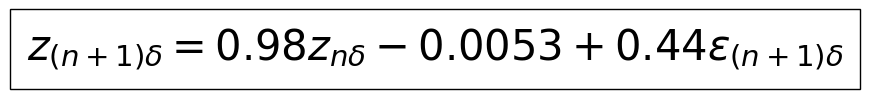

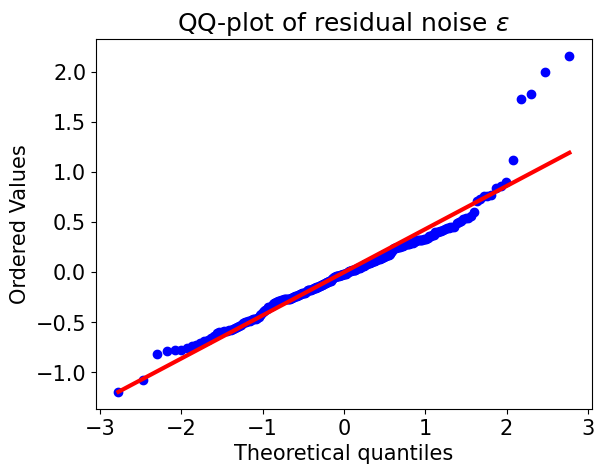

In [ ]:
slope, intercept, _,_,_= scipy.stats.linregress(
    adj_A,adj_B)
print("slope: "+str(slope))
print("intercept: "+str(intercept))
#portfolio=adj_B-adj_A*slope-intercept
#portfolio.name="Portfolio"
residual=adj_B-(intercept+adj_A*slope)
residual.name="residual"
print(residual.head())

text=[]
text.append("{0:}={1:.2f}{2:}{3:+.2f}".format(ticker_B,slope,ticker_A,intercept))
textbox(text,"regress_formula")


plt.scatter(adj_A,adj_B,label="prices")
plt.plot(adj_A,intercept+adj_A*slope,color="red",label="regression")
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title("Regression")
legend("bottom")
saver("regression")
plt.show()
plt.close()


#Residual
plt.figure()
plt.plot(residual.index,residual,label="signal")
plt.ylabel("Residual")
plt.xlabel("Date")
plt.title(r"Residual $z$")
plt.gcf().autofmt_xdate()
saver("residual")
plt.show()
plt.close()

#Join Residual Plot

plt.figure()
plt.plot(residual.index,residual/residual.std(),label=r"residual $z^\circ$",linestyle="dotted")
plt.plot(normalized_A.index,(normalized_A-normalized_A.mean())/normalized_A.std(),label=ticker_A,color=color_A)
plt.plot(normalized_B.index,(normalized_B-normalized_B.mean())/normalized_B.std(),label=ticker_B,color=color_B)
#plt.ylabel("")
plt.xlabel("Date")
plt.title("Assets")
plt.gcf().autofmt_xdate()
legend("bottom",extra=True)
saver("assets")
plt.show()
plt.close()

#autocorrelation

plt.figure()
autocorrelation_plot(residual)
plt.title(r"Autocorrelation of residual $z$")
plt.xlabel("Lag (days)")
saver("acf_portfolio")
plt.show()
plt.close()

#Shifting Residual
residual_lagged=residual.shift(periods=1)
residual_lagged.name="residual_lagged"
DF=pandas.concat([residual,residual_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
#print(DF.head())
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual_lagged"],DF["residual"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise=DF["residual"]-(intercept_R+DF["residual_lagged"]*slope_R)
noise_std=numpy.std(noise)
noise_normalized=noise/noise_std
print("noise mean",numpy.mean(noise))
print("noise std: ",noise_std)

text=[]
text.append(r"$z_{{(n+1)\delta}}={:.2f}z_{{n\delta}}{:+.4f}+{:.2f}\varepsilon_{{(n+1)\delta}}$".format(slope_R,intercept_R,noise_std))
fig,ax=plt.subplots(figsize=(1,1))
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("AR_formula")
plt.show()
plt.close()


# Noise QQ-plot
scipy.stats.probplot(noise.values, dist="norm", plot=plt)
plt.title(r"QQ-plot of residual noise $\varepsilon$")
saver("QQ")
plt.show()
plt.close()

Regressing F based on GM

slope: 0.21487542621688405
intercept: 4.545980059322702
Date
2023-01-03   -1.165881
2023-01-04   -1.052198
2023-01-05   -0.900911
2023-01-06   -0.795729
2023-01-09   -0.698310
Name: residual, dtype: float64


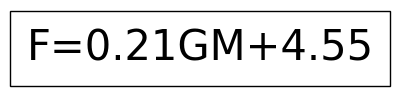

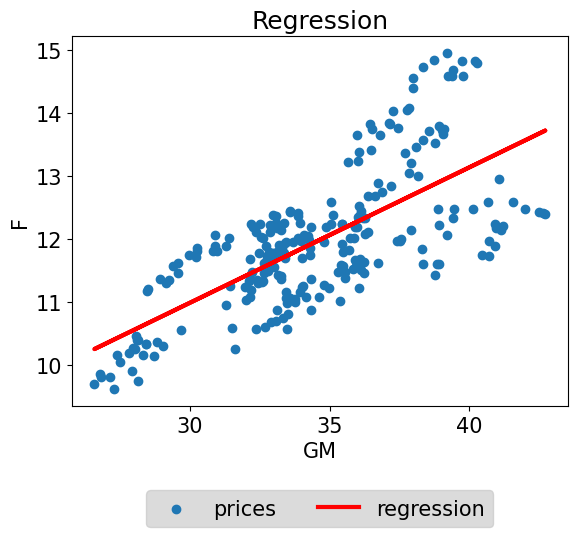

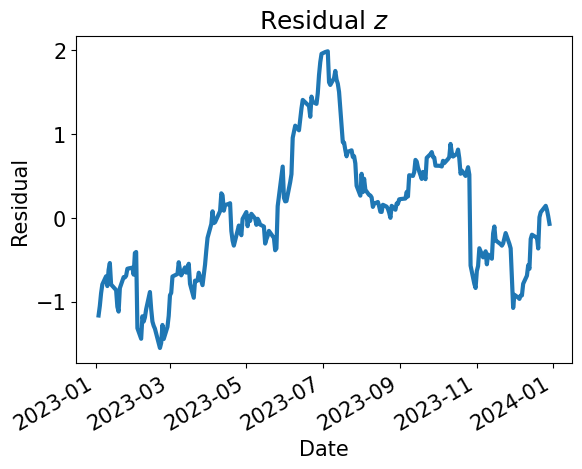

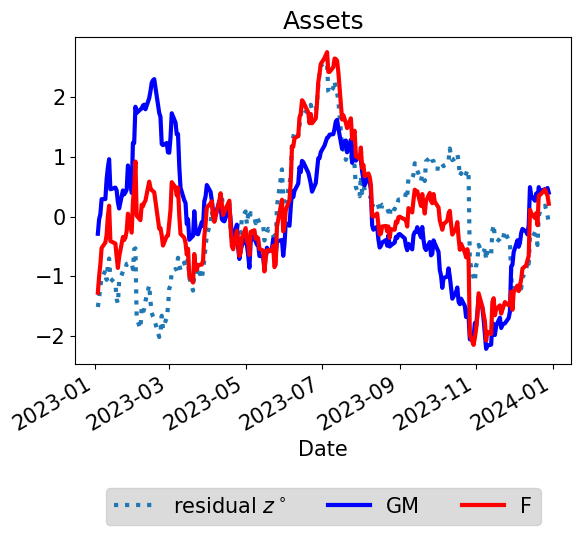

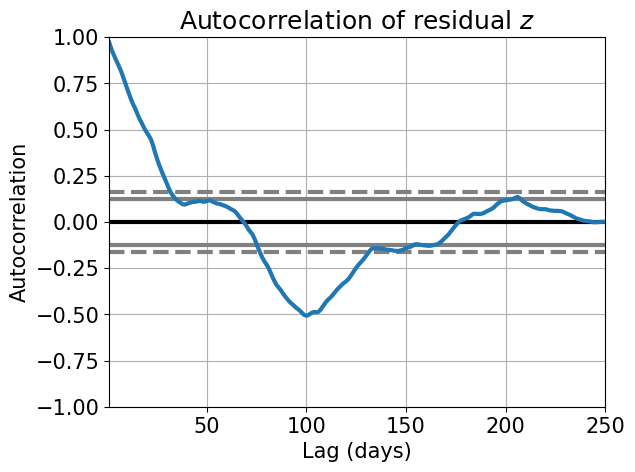

            residual  residual_lagged
Date                                 
2023-01-03 -1.165881              NaN
2023-01-04 -1.052198        -1.165881
2023-01-05 -0.900911        -1.052198
2023-01-06 -0.795729        -0.900911
2023-01-09 -0.698310        -0.795729
AR slope: 0.9717508287573798
AR intercept: 0.004392271032399003
noise mean 1.9618398828717626e-17
noise std:  0.16620491893726674


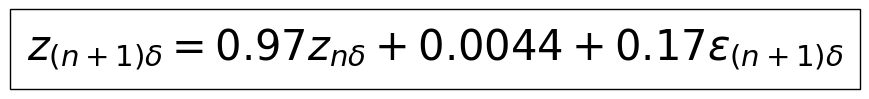

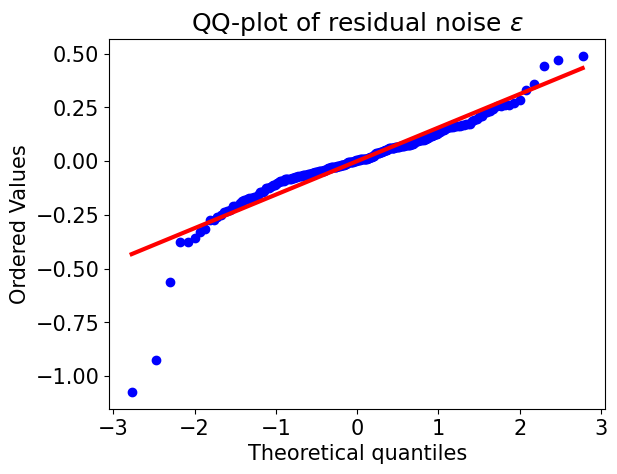

In [ ]:
slope, intercept, _,_,_= scipy.stats.linregress(
    adj_B,adj_A)
print("slope: "+str(slope))
print("intercept: "+str(intercept))
#portfolio=adj_B-adj_A*slope-intercept
#portfolio.name="Portfolio"
residual=adj_A-(intercept+adj_B*slope)
residual.name="residual"
print(residual.head())

text=[]
text.append("{0:}={1:.2f}{2:}{3:+.2f}".format(ticker_A,slope,ticker_B,intercept))
textbox(text,"regress_formula")

plt.scatter(adj_B,adj_A,label="prices")
plt.plot(adj_B,intercept+adj_B*slope,color="red",label="regression")
plt.xlabel(ticker_B)
plt.ylabel(ticker_A)
plt.title("Regression")
legend("bottom")
saver("regression")
plt.show()
plt.close()
plt.figure()


# Residual
plt.plot(residual.index,residual,label="signal")
plt.ylabel("Residual")
plt.xlabel("Date")
plt.title(r"Residual $z$")
plt.gcf().autofmt_xdate()
saver("residual")
plt.show()
plt.close()

#Join Residual Plot
plt.figure()
plt.plot(residual.index,residual/residual.std(),label=r"residual $z^\circ$",linestyle="dotted")
plt.plot(normalized_B.index,(normalized_B-normalized_B.mean())/normalized_B.std(),label=ticker_B,color=color_B)
plt.plot(normalized_A.index,(normalized_A-normalized_A.mean())/normalized_A.std(),label=ticker_A,color=color_A)
#plt.ylabel("")
plt.xlabel("Date")
plt.title("Assets")
plt.gcf().autofmt_xdate()
legend("bottom",extra=True)
saver("assets")
plt.show()
plt.close()


#Autocorrelation
plt.figure()
autocorrelation_plot(residual)
plt.title(r"Autocorrelation of residual $z$")
plt.xlabel("Lag (days)")
saver("acf_portfolio")
plt.show()
plt.close()



#Shifting Residual
residual_lagged=residual.shift(periods=1)
residual_lagged.name="residual_lagged"
DF=pandas.concat([residual,residual_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
#print(DF.head())
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual_lagged"],DF["residual"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise=DF["residual"]-(intercept_R+DF["residual_lagged"]*slope_R)
noise_std=numpy.std(noise)
noise_normalized=noise/noise_std
print("noise mean",numpy.mean(noise))
print("noise std: ",noise_std)

text=[]
text.append(r"$z_{{(n+1)\delta}}={:.2f}z_{{n\delta}}{:+.4f}+{:.2f}\varepsilon_{{(n+1)\delta}}$".format(slope_R,intercept_R,noise_std))
fig,ax=plt.subplots(figsize=(1,1))
ax.add_artist(offsetbox.AnchoredText("\n".join(text), loc="center",prop=dict(size=30)))
ax.axis('off')
saver("AR_formula")
plt.show()
plt.close()


# Noise QQ-plot
scipy.stats.probplot(noise.values, dist="norm", plot=plt)
plt.title(r"QQ-plot of residual noise $\varepsilon$")
saver("QQ")
plt.show()
plt.close()

# Observations




*   By looking at the residual, it does seem that each choice of predictor has the advantage in different time point. The residual for regressing F based on GM performs better during the period from May - September 2023 while some other periods choosing the predictor in other way around actually perform better
*   From the autocorrelation graph, it seems there are slightly more days where the model of regressing F based on GM are performing better.
*   The QQ-plot for the noise however does not show too much different in terms of the distribution in the noise



# Conclusion


*   It is hard to say which model is performing better based on the given data. Maybe the conclusion can get clearer once we have a wider span of time series
*   From the strategic point of view, it seems like there is a better model depending on which strategy one wants to use for trading however.
  * For example, the model regressing GM=LinearRegression(F) tends to predict the price lower than the actual price while F=LinearRegression(GM) tends to predict the price higher than the actual price. So there is definitely a strategic choice of model here.   

